# Data Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Import Required Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.shape

(1599, 12)

We have a 1599 row and 12 column in the dataset.

# Describe Dataset

In [6]:
#Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We have a outlier and skewness. So we will check in further step

In [7]:
#Checking the null value in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We don't have a null value in the dataset

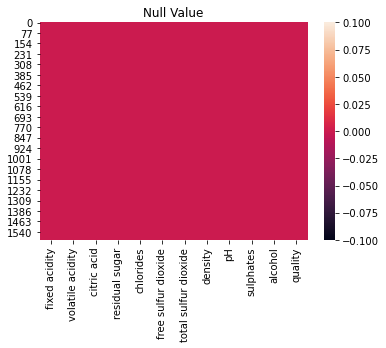

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Correlation

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Correlation using heatmap

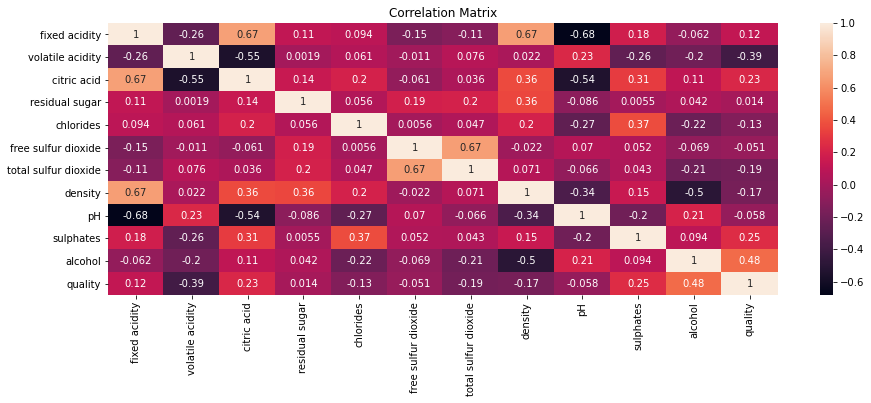

In [10]:
corr_mat=df.corr()

plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we have a 5 positive correlation column out of 12 column.
In that Alcohol has 50% correlation with target column which can be consider as strong bond.

# Outlier Checking 

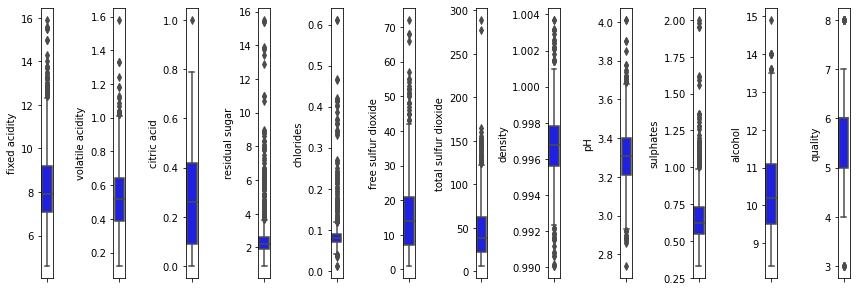

In [26]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a more outlier in all the column except citric acid & quality column. we will rectify in further step

# Checking Skewness

In [28]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Data Cleaning

In [33]:
df=df.drop(['chlorides'],axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Removing Outlier

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1599, 11)

In [35]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   33,   38,   43,   45,   57,   81,
         86,   88,   91,   92,   95,  106,  109,  120,  126,  127,  142,
        144,  151,  151,  151,  163,  164,  169,  199,  226,  243,  244,
        258,  274,  324,  325,  339,  340,  347,  354,  374,  381,  391,
        396,  396,  400,  400,  442,  442,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  584,  588,
        591,  595,  608,  614,  636,  639,  649,  649,  651,  652,  652,
        652,  672,  672,  684,  690,  690,  692,  695,  723,  724,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1071, 1074, 1079, 1079, 1081, 1081,
       1111, 1114, 1131, 1154, 1175, 1186, 1231, 1235, 1244, 1244, 1244,
       1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1299, 1299, 1300,
       1312, 1316, 1319, 1321, 1358, 1367, 1370, 1372, 1374, 1434, 1434,
       1434, 1435, 1435, 1435, 1469, 1474, 1474, 1

In [45]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 11)
(1468, 11)


In [46]:
Loss_percentage=(1599-1468)/1599*100
print(Loss_percentage)

8.19262038774234


In [50]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

# Data Transform for Remove Skewness

In [55]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[-4.69385035e-01,  1.05810413e+00, -1.52865806e+00, ...,
         1.36584336e+00, -5.96632578e-01, -1.11270545e+00],
       [-1.71455187e-01,  1.92458072e+00, -1.52865806e+00, ...,
        -8.00914194e-01,  4.31468803e-01, -5.21607021e-01],
       [-1.71455187e-01,  1.36014861e+00, -1.25166456e+00, ...,
        -3.68338862e-01,  2.03948538e-01, -5.21607021e-01],
       ...,
       [-1.45544335e+00, -1.83864038e-03, -6.75999168e-01, ...,
         7.53772860e-01,  8.99884994e-01,  7.50244043e-01],
       [-1.89123668e+00,  7.68336345e-01, -7.36978839e-01, ...,
         1.76660628e+00,  6.42270272e-01, -2.53308330e-02],
       [-1.77765937e+00, -1.33134123e+00,  1.05779633e+00, ...,
         5.46753371e-01,  2.81745284e-01,  7.50244043e-01]])

In [56]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[-4.69385035e-01,  1.05810413e+00, -1.52865806e+00, ...,
         1.36584336e+00, -5.96632578e-01, -1.11270545e+00],
       [-1.71455187e-01,  1.92458072e+00, -1.52865806e+00, ...,
        -8.00914194e-01,  4.31468803e-01, -5.21607021e-01],
       [-1.71455187e-01,  1.36014861e+00, -1.25166456e+00, ...,
        -3.68338862e-01,  2.03948538e-01, -5.21607021e-01],
       ...,
       [-1.45544335e+00, -1.83864038e-03, -6.75999168e-01, ...,
         7.53772860e-01,  8.99884994e-01,  7.50244043e-01],
       [-1.89123668e+00,  7.68336345e-01, -7.36978839e-01, ...,
         1.76660628e+00,  6.42270272e-01, -2.53308330e-02],
       [-1.77765937e+00, -1.33134123e+00,  1.05779633e+00, ...,
         5.46753371e-01,  2.81745284e-01,  7.50244043e-01]])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random state",maxRS)

Best Accuracy is 0.6598639455782312 on Random state 114


# Creating Train-Test Split

In [63]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=114)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.6598639455782312
[[  0   8   7   1   0]
 [  0 155  28   1   0]
 [  0  58 110  19   0]
 [  0   3  22  26   0]
 [  0   0   2   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.69      0.84      0.76       184
           6       0.65      0.59      0.62       187
           7       0.54      0.51      0.53        51
           8       0.00      0.00      0.00         3

    accuracy                           0.66       441
   macro avg       0.38      0.39      0.38       441
weighted avg       0.63      0.66      0.64       441



In [65]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.6417233560090703
[[  1   4   8   3   0]
 [  5 133  41   5   0]
 [  1  49 121  13   3]
 [  0   3  19  28   1]
 [  0   1   0   2   0]]
              precision    recall  f1-score   support

           4       0.14      0.06      0.09        16
           5       0.70      0.72      0.71       184
           6       0.64      0.65      0.64       187
           7       0.55      0.55      0.55        51
           8       0.00      0.00      0.00         3

    accuracy                           0.64       441
   macro avg       0.41      0.40      0.40       441
weighted avg       0.63      0.64      0.64       441



In [66]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.7029478458049887
[[  0   8   7   1   0]
 [  0 154  29   1   0]
 [  0  47 127  13   0]
 [  0   3  19  29   0]
 [  0   0   1   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.73      0.84      0.78       184
           6       0.69      0.68      0.69       187
           7       0.63      0.57      0.60        51
           8       0.00      0.00      0.00         3

    accuracy                           0.70       441
   macro avg       0.41      0.42      0.41       441
weighted avg       0.67      0.70      0.68       441



In [67]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.6689342403628118
[[  0   8   7   1   0]
 [  0 156  27   1   0]
 [  0  58 115  14   0]
 [  0   4  23  24   0]
 [  0   0   2   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.69      0.85      0.76       184
           6       0.66      0.61      0.64       187
           7       0.59      0.47      0.52        51
           8       0.00      0.00      0.00         3

    accuracy                           0.67       441
   macro avg       0.39      0.39      0.38       441
weighted avg       0.64      0.67      0.65       441



We are getting the high accuracy with RandomForest is 70%. It will be cross check with CV 

In [92]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean())
print("Cross Validation Score of DT :",scr.mean())
print("Cross Validation Score of RF :",sc.mean())
print("Cross Validation Score of svc :",scor.mean())

Cross Validation Score of LR : 0.5681549070140001
Cross Validation Score of DT : 0.4659213856190941
Cross Validation Score of RF : 0.5796986371340346
Cross Validation Score of svc : 0.5810754335864038


Minimum Difference in accuracy and cross_validation score is for Logistic Regression(9.0). So, this is best model

# Model Saving

In [96]:
import pickle
filename='Winequality.pkl'
pickle.dump(LR,open(filename,'wb'))

# Conclusion

In [81]:
Conc=np.array(Y_test)
Predicted=np.array(LR.predict(x_test))
df_con=pd.DataFrame({"Original":Conc,"Predicted":Predicted},index=range(len(Conc)))
df_con

,Original,Predicted
0,6,7
1,6,6
2,6,5
3,5,5
4,5,5
...,...,...
436,6,6
437,5,6
438,6,5
439,6,6


We have a the otcome for this model